Построить классификатор изображений рукописного ввода на базе MNIST. Классификатор предлагается строить на признаках, полученных в результате предобработки изображений, например, гистограммы градиентов (HOG) или результат PCA преобразования. В качестве модели классификатора можно использовать любую модель, за исключением сверточных нейронных сетей. Критерием качества классификатора является метрика accuracy с результатом более 0.6

In [34]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [47]:
train = np.loadtxt('train.csv', delimiter=',', skiprows=1)

In [90]:
train.shape

(42000, 785)

In [48]:
train_label = train[:, 0]
train_img = np.resize(train[:, 1:], (train.shape[0], 28, 28))

In [105]:
train_img.shape

(42000, 28, 28)

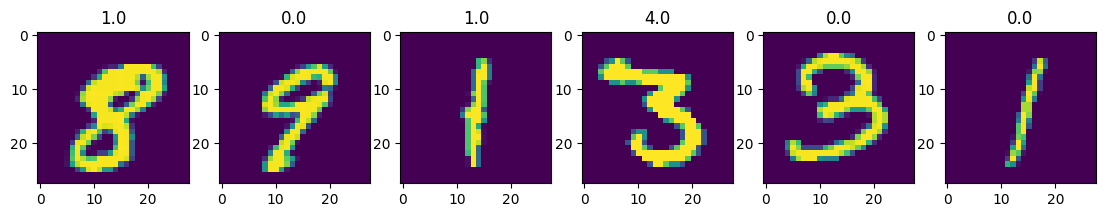

In [106]:
fig = plt.figure(figsize=(16, 10))
for i, img in enumerate(train_img[10:16], 1):
    subplot = fig.add_subplot(1, 7, i)
    plt.imshow(img)
    subplot.set_title('%s' % train_label[i - 1])

In [9]:
train_sobel_x = np.zeros_like(train_img)
train_sobel_y = np.zeros_like(train_img)
for i in range(len(train_img)):
    train_sobel_x[i] = cv2.Sobel(train_img[i], cv2.CV_64F, dx=1, dy=0, ksize=3)
    train_sobel_y[i] = cv2.Sobel(train_img[i], cv2.CV_64F, dx=0, dy=1, ksize=3)

In [10]:
train_g, train_theta = cv2.cartToPolar(train_sobel_x, train_sobel_y)

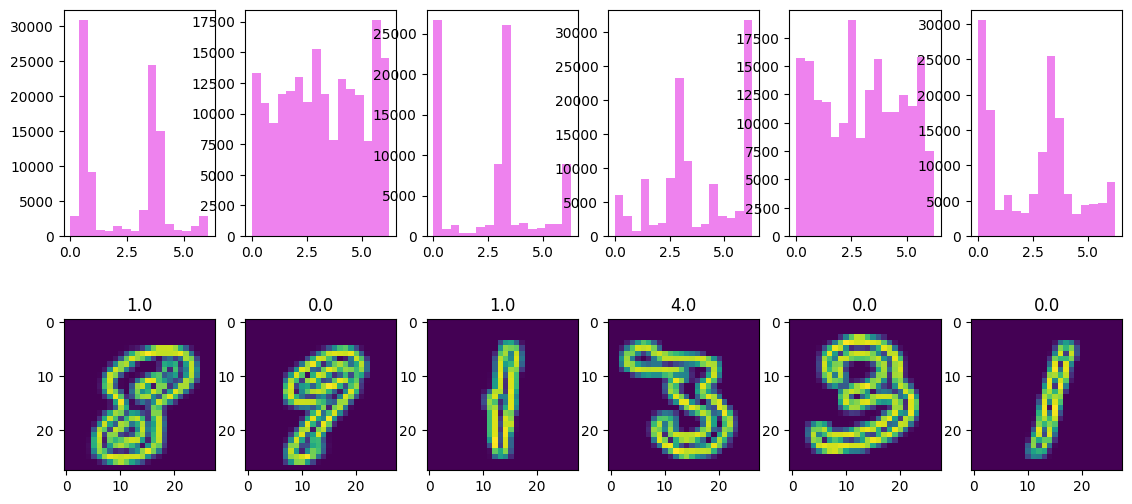

In [119]:
fig = plt.figure(figsize=(16, 10))
for i, img in enumerate(train_g[10:16], 1):
    subplot = fig.add_subplot(1, 7, i)
    plt.imshow(img)
    subplot.set_title('%s' % train_label[i - 1])
    subplot = fig.add_subplot(3, 7, i)
    plt.hist(train_theta[i - 1].flatten(), bins=16, color='violet', weights=train_g[i - 1].flatten())

In [107]:
train_hist = np.zeros((len(train_img), 16))
for i in range(len(train_img)):
    hist, borders = np.histogram(train_theta[i],
                                 bins=16,
                                 range=(0., 2. * np.pi),
                                 weights=train_g[i])
    train_hist[i] = hist

(array([[1.1844e+04, 1.6095e+04, 9.0000e+03, 4.0900e+03, 9.2300e+02,
         4.8000e+01, 0.0000e+00],
        [1.0638e+04, 1.5730e+04, 9.1940e+03, 4.4430e+03, 1.6610e+03,
         3.1000e+02, 2.4000e+01],
        [1.8995e+04, 1.4886e+04, 6.1760e+03, 1.6010e+03, 2.9900e+02,
         3.8000e+01, 5.0000e+00],
        [1.7960e+04, 1.5106e+04, 6.7470e+03, 1.8450e+03, 3.0600e+02,
         3.5000e+01, 1.0000e+00],
        [2.2020e+04, 1.3313e+04, 4.9320e+03, 1.3700e+03, 2.8800e+02,
         6.3000e+01, 1.4000e+01],
        [3.2756e+04, 8.3900e+03, 8.0300e+02, 4.6000e+01, 5.0000e+00,
         0.0000e+00, 0.0000e+00],
        [3.0858e+04, 1.0270e+04, 8.3700e+02, 3.2000e+01, 3.0000e+00,
         0.0000e+00, 0.0000e+00],
        [2.7132e+04, 1.2436e+04, 1.9150e+03, 4.5100e+02, 6.2000e+01,
         4.0000e+00, 0.0000e+00],
        [1.1231e+04, 1.6117e+04, 8.4930e+03, 4.8990e+03, 1.1640e+03,
         9.4000e+01, 2.0000e+00],
        [1.2727e+04, 1.4723e+04, 8.2640e+03, 4.2400e+03, 1.7250e+03,
    

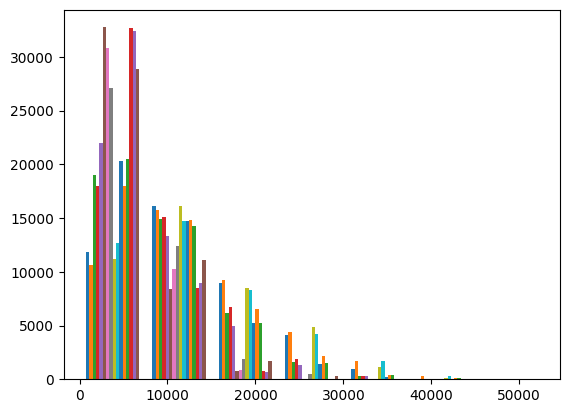

In [108]:
plt.hist(train_hist, bins=7)

In [109]:
train_hist = train_hist / np.linalg.norm(train_hist, axis=1)[:, None]

In [110]:
y_train, y_val, x_train, x_val = train_test_split(train_label, train_hist, test_size=0.25, random_state=7)

In [111]:
x_train.shape, y_train.shape, x_val.shape, y_val.shape

((31500, 16), (31500,), (10500, 16), (10500,))

In [115]:
svc = SVC(class_weight='balanced', decision_function_shape='ovo', probability=True, random_state=7).fit(x_train, y_train)

In [116]:
preds = svc.predict(x_val)

In [120]:
accuracy = accuracy_score(y_val, preds)
print(f'Точность составила {round(accuracy, 2)}')

Точность составила 0.66


In [118]:
print(classification_report(y_val, preds))

              precision    recall  f1-score   support

         0.0       0.49      0.50      0.49      1047
         1.0       0.97      0.94      0.96      1190
         2.0       0.51      0.46      0.48      1015
         3.0       0.64      0.67      0.65      1100
         4.0       0.69      0.74      0.72      1046
         5.0       0.63      0.68      0.66       907
         6.0       0.50      0.46      0.48      1016
         7.0       0.87      0.80      0.83      1090
         8.0       0.55      0.60      0.58      1060
         9.0       0.68      0.68      0.68      1029

    accuracy                           0.66     10500
   macro avg       0.65      0.65      0.65     10500
weighted avg       0.66      0.66      0.66     10500

